# Hydrogen Dimer

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import pydeft as deft
import profess

This example explores the Hydrogen dimer.

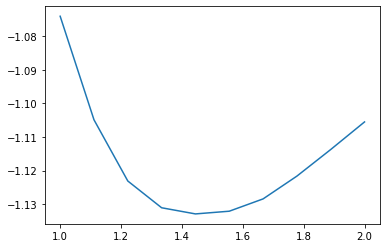

In [2]:
box_length = 20
grid_shape = [49,49,49]

def H2_energy(distance):

    system = profess.System(grid_shape)
    (system
        # set box vectors
        .set_box(box_length*np.eye(3))
        # add two Hydrogen ions and electrons
        .add_coulomb_ions(1.0, [[0,0,0],[distance,0,0]])
        .distribute_electrons_uniformly(system.total_ion_charge())
        # set energy functionals
        .add_weizsaecker_functional()
        .add_ion_electron_functional()
        .add_hartree_functional()
        .add_perdew_zunger_functional()
    )
    
    # find minimum energy and return it
    system.minimize_energy()
    return system.energy()

distances = np.linspace(1, 2, 10)
energies = []
for d in distances:
    energies.append(H2_energy(d))

plt.plot(distances, energies)
plt.show()

It's nice to see the energy for several distances, but shouldn't we be able to find it more precisely? Yes, by minimizing the forces.

(Also put experimental)